In [1]:
from src.data_preprocessing import StockDataProcessor
from src.trainer import StockTrainer

In [2]:
stock_data = StockDataProcessor(file_path="./data/AAPL_stock_data.csv", seq_length=60)
X_train, y_train, X_test, y_test = stock_data.get_data()

In [3]:
import pandas as pd

In [3]:
data_df = stock_data.load_data()

In [4]:
data_df

,Open,High,Low,Close,Volume,SMA_10,EMA_10,RSI,MACD
0,6.422878,6.455078,6.391280,6.440332,493729600,6.336989,6.321519,29.355406,-0.135540
1,6.458086,6.487879,6.417459,6.451466,601904800,6.336989,6.321519,29.355406,-0.135540
2,6.451467,6.477047,6.342227,6.348848,552160000,6.336989,6.321519,29.355406,-0.135540
3,6.372320,6.379844,6.291067,6.337110,477131200,6.336989,6.321519,29.355406,-0.135540
4,6.328680,6.379840,6.291365,6.379238,447610800,6.336989,6.321519,29.355406,-0.135540
...,...,...,...,...,...,...,...,...,...
3768,254.490204,255.369227,253.171646,254.989655,40858800,249.972160,249.766270,73.085636,5.765470
3769,255.209412,257.926411,255.009620,257.916443,23234700,251.014017,251.248119,75.750268,6.067327
3770,257.906429,259.814335,257.347047,258.735504,27237100,252.265639,252.609462,76.452857,6.300019
3771,257.546826,258.415896,252.782075,255.309296,42355300,253.027800,253.100341,67.626290,6.137217


In [5]:
data_df_nom = stock_data.preprocess_data(data_df)

In [6]:
data_df_nom 

tensor([[0.0025, 0.0022, 0.0026,  ..., 0.0016, 0.1195, 0.4130],
        [0.0027, 0.0023, 0.0028,  ..., 0.0016, 0.1195, 0.4130],
        [0.0026, 0.0023, 0.0025,  ..., 0.0016, 0.1195, 0.4130],
        ...,
        [1.0000, 1.0000, 1.0000,  ..., 0.9980, 0.7956, 0.8299],
        [0.9986, 0.9945, 0.9819,  ..., 1.0000, 0.6689, 0.8194],
        [0.9764, 0.9740, 0.9727,  ..., 0.9991, 0.5626, 0.7891]])

In [7]:
data_df_nom.shape

torch.Size([3773, 9])

In [8]:
x_se, y_se= stock_data.create_sequences(data_df_nom)

In [9]:
y_se.shape


torch.Size([3713, 1])

## train and evaluate the model

2025-04-01 12:20:27,279 - StockPredictionApp - INFO - Using device: mps
2025-04-01 12:20:28,850 - StockPredictionApp - INFO - Epoch 1/10, Loss: 0.0016
2025-04-01 12:20:30,112 - StockPredictionApp - INFO - Epoch 2/10, Loss: 0.0000
2025-04-01 12:20:31,255 - StockPredictionApp - INFO - Epoch 3/10, Loss: 0.0000
2025-04-01 12:20:32,437 - StockPredictionApp - INFO - Epoch 4/10, Loss: 0.0000
2025-04-01 12:20:33,694 - StockPredictionApp - INFO - Epoch 5/10, Loss: 0.0000
2025-04-01 12:20:35,004 - StockPredictionApp - INFO - Epoch 6/10, Loss: 0.0000
2025-04-01 12:20:36,394 - StockPredictionApp - INFO - Epoch 7/10, Loss: 0.0000
2025-04-01 12:20:37,601 - StockPredictionApp - INFO - Epoch 8/10, Loss: 0.0000
2025-04-01 12:20:38,848 - StockPredictionApp - INFO - Epoch 9/10, Loss: 0.0000
2025-04-01 12:20:40,169 - StockPredictionApp - INFO - Epoch 10/10, Loss: 0.0000
2025-04-01 12:20:40,178 - StockPredictionApp - INFO - Model saved to ./models/AAPL_model.pt
2025-04-01 12:20:40,336 - StockPredictionApp 

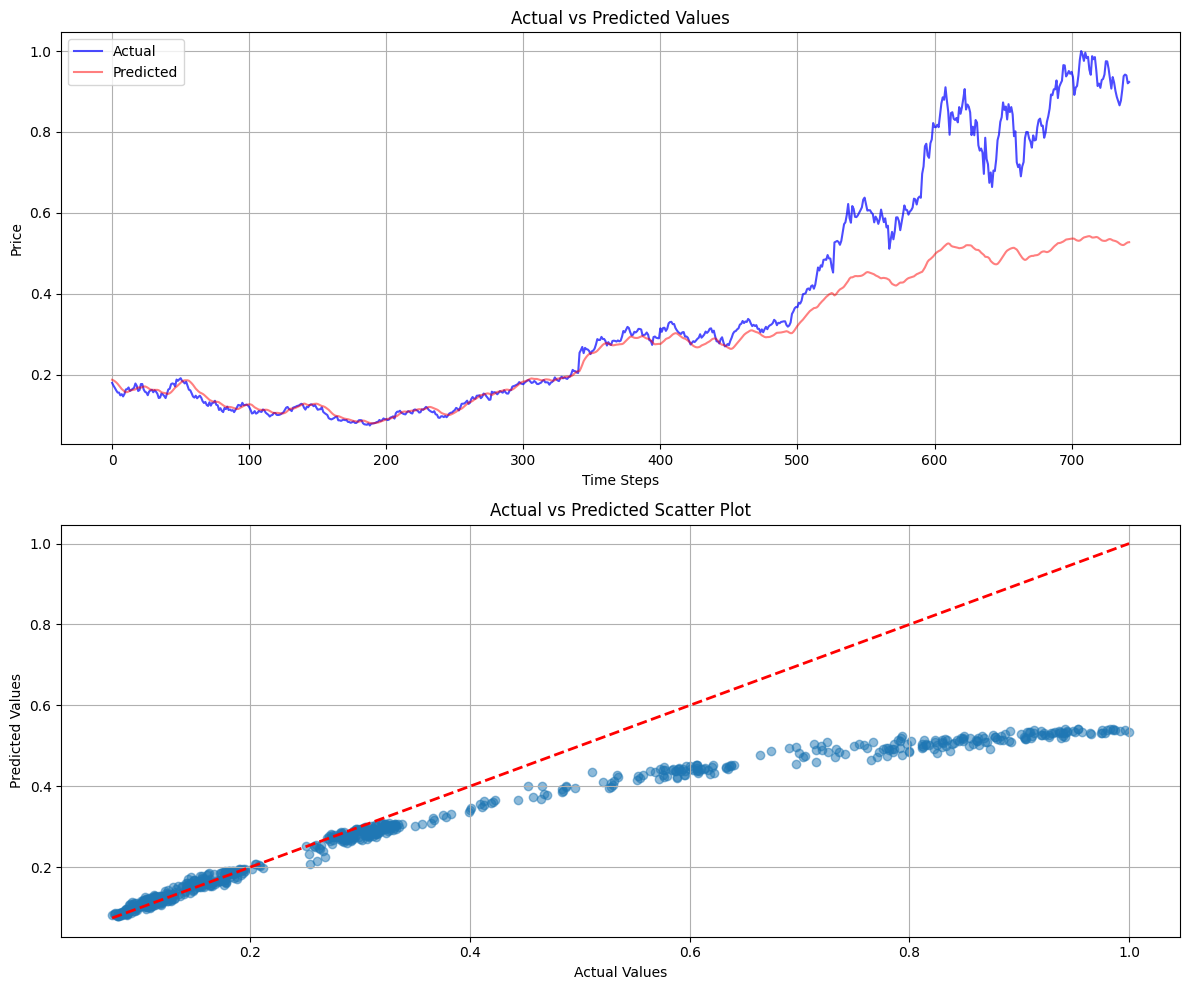

In [11]:
from src.utils.data_models import TrainingConfig
training_config = TrainingConfig(
    epochs=10,
)
stock_trainer = StockTrainer(
    training_config=training_config,
    file_path="data/NVDA_stock_data.csv", 
    model_save_path="./models/AAPL_model.pt"
)
stock_trainer.train() 
